## Import Dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
%matplotlib inline

## Read CSV File

In [2]:
spark = SparkSession.builder.appName('eda').getOrCreate()

In [3]:
# dataSet = pd.read_csv("housePricing.csv")
dataSet = spark.read.csv("housePricing.csv",header=True,inferSchema=True)

In [8]:
print("Null Values")
for columns in dataSet.columns:
    if dataSet.filter(col(columns).isNull()).count() >0:
        print(columns, dataSet.filter(col(columns).isNull()).count())

Null Values
Lot Frontage 490
Mas Vnr Type 23
Mas Vnr Area 23
Bsmt Qual 1
Bsmt Cond 1
Bsmt Exposure 4
BsmtFin Type 1 1
BsmtFin SF 1 1
BsmtFin Type 2 2
BsmtFin SF 2 1
Bsmt Unf SF 1
Total Bsmt SF 1
Electrical 1
Bsmt Full Bath 2
Bsmt Half Bath 2
Garage Yr Blt 159
Garage Finish 2
Garage Cars 1
Garage Area 1
Garage Qual 1
Garage Cond 1


In [4]:
dataSet.printSchema()

root
 |-- Order: integer (nullable = true)
 |-- PID: integer (nullable = true)
 |-- MS SubClass: integer (nullable = true)
 |-- MS Zoning: string (nullable = true)
 |-- Lot Frontage: integer (nullable = true)
 |-- Lot Area: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- Lot Shape: string (nullable = true)
 |-- Land Contour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- Lot Config: string (nullable = true)
 |-- Land Slope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition 1: string (nullable = true)
 |-- Condition 2: string (nullable = true)
 |-- Bldg Type: string (nullable = true)
 |-- House Style: string (nullable = true)
 |-- Overall Qual: integer (nullable = true)
 |-- Overall Cond: integer (nullable = true)
 |-- Year Built: integer (nullable = true)
 |-- Year Remod/Add: integer (nullable = true)
 |-- Roof Style: string (nullable = true)
 |-- Roof Matl: string (nulla

## DataSet Redifine

In [5]:
numerical = ["SalePrice","Lot Area","Overall Qual","Overall Cond",
             "1st Flr SF","2nd Flr SF","Bedroom AbvGr"]

categorical = [
  'MS Zoning', 'Lot Shape', 'Neighborhood', 'Central Air', 'Sale Condition', 'Mo Sold', 'Yr Sold'
]

dataSet = dataSet[numerical+categorical]

dataSet.toPandas().shape


(2930, 14)

## SeaBorn Histagram

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


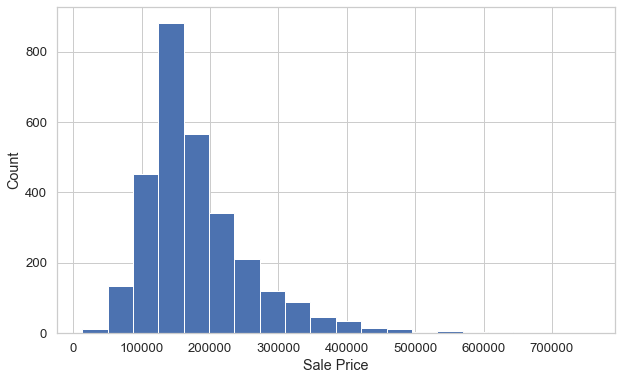

In [6]:
sb.set(style='whitegrid', palette="deep", font_scale=1.2, rc={"figure.figsize": [10, 6]})
sb.distplot(
    dataSet.select('SalePrice').toPandas(), norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

## Analyse using Pandas Ploting to visualise Histgram

array([[<AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'Lot Area'}>,
        <AxesSubplot:title={'center':'Overall Qual'}>,
        <AxesSubplot:title={'center':'Overall Cond'}>],
       [<AxesSubplot:title={'center':'1st Flr SF'}>,
        <AxesSubplot:title={'center':'2nd Flr SF'}>,
        <AxesSubplot:title={'center':'Bedroom AbvGr'}>, <AxesSubplot:>]],
      dtype=object)

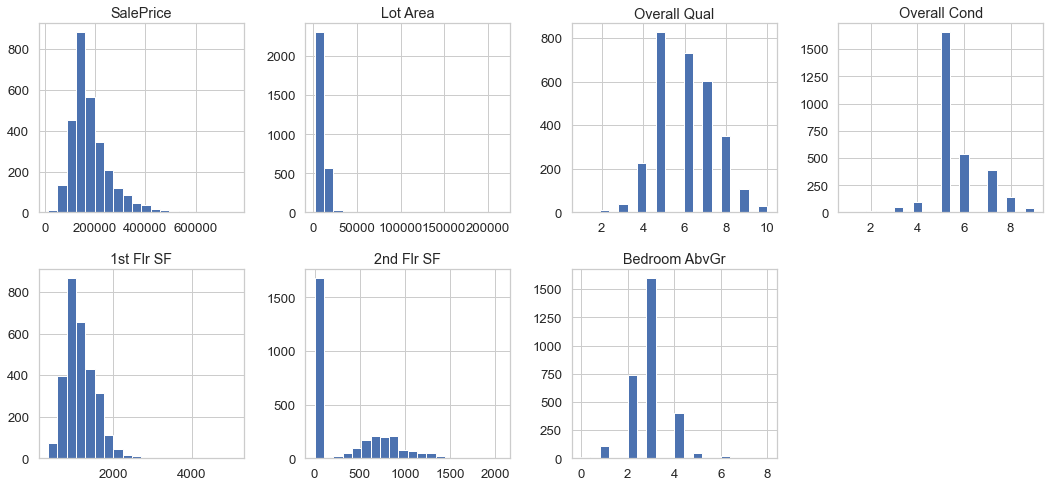

In [7]:
dataSet.select(numerical).toPandas().hist(bins=20,figsize = (18,8),layout=(2,4))

## Analyse Sale Condition with object varialble

In [8]:
saleCondition = dataSet.select('Sale Condition').toPandas()

<AxesSubplot:xlabel='Sale Condition', ylabel='count'>

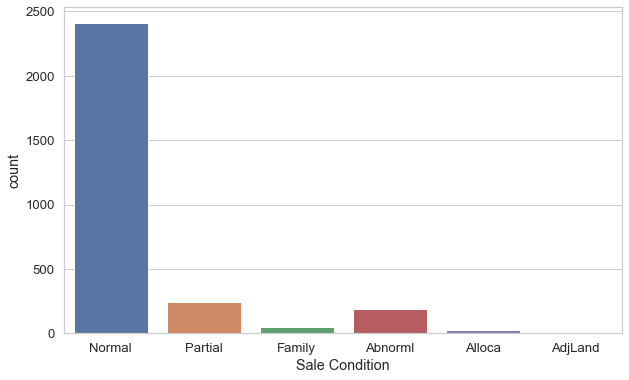

In [9]:
sb.countplot(x='Sale Condition',data=saleCondition)

## Analyse through all Object Variables

In [10]:
c_df = dataSet.select(categorical).toPandas()

In [23]:
c_df

,MS Zoning,Lot Shape,Neighborhood,Central Air,Sale Condition,Mo Sold,Yr Sold
0,RL,IR1,NAmes,Y,Normal,5,2010
1,RH,Reg,NAmes,Y,Normal,6,2010
2,RL,IR1,NAmes,Y,Normal,6,2010
3,RL,Reg,NAmes,Y,Normal,4,2010
4,RL,IR1,Gilbert,Y,Normal,3,2010
...,...,...,...,...,...,...,...
2925,RL,IR1,Mitchel,Y,Normal,3,2006
2926,RL,IR1,Mitchel,Y,Normal,6,2006
2927,RL,Reg,Mitchel,Y,Normal,7,2006
2928,RL,Reg,Mitchel,Y,Normal,4,2006


In [50]:
# fig, ax = pt.subplots(4, 2, figsize=(20, 40))
# for variable, subplot in zip(categorical, ax.flatten()):
#     sb.barp(c_df, ax=subplot)
#     for label in subplot.get_xticklabels():
#         label.set_rotation(90)


## Analyse the relation between numercal variables

In [55]:
pandasdf = dataSet.toPandas()

x = pandasdf['1st Flr SF']
y = pandasdf['SalePrice']

In [56]:
type(x)

pandas.core.series.Series

In [57]:
# x = dataSet.select('1st Flr SF').toPandas()
# type(x)

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


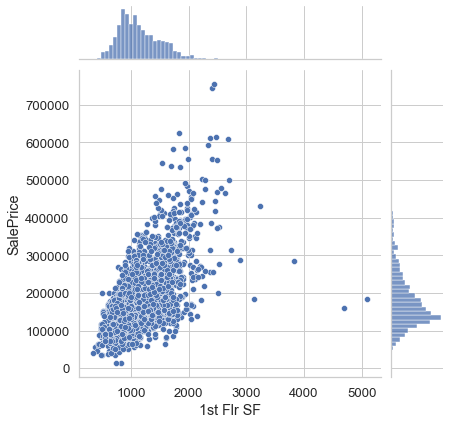

In [58]:
sb.jointplot(x,y)

## Analyse Relation between Numerical and Catogarical Variables

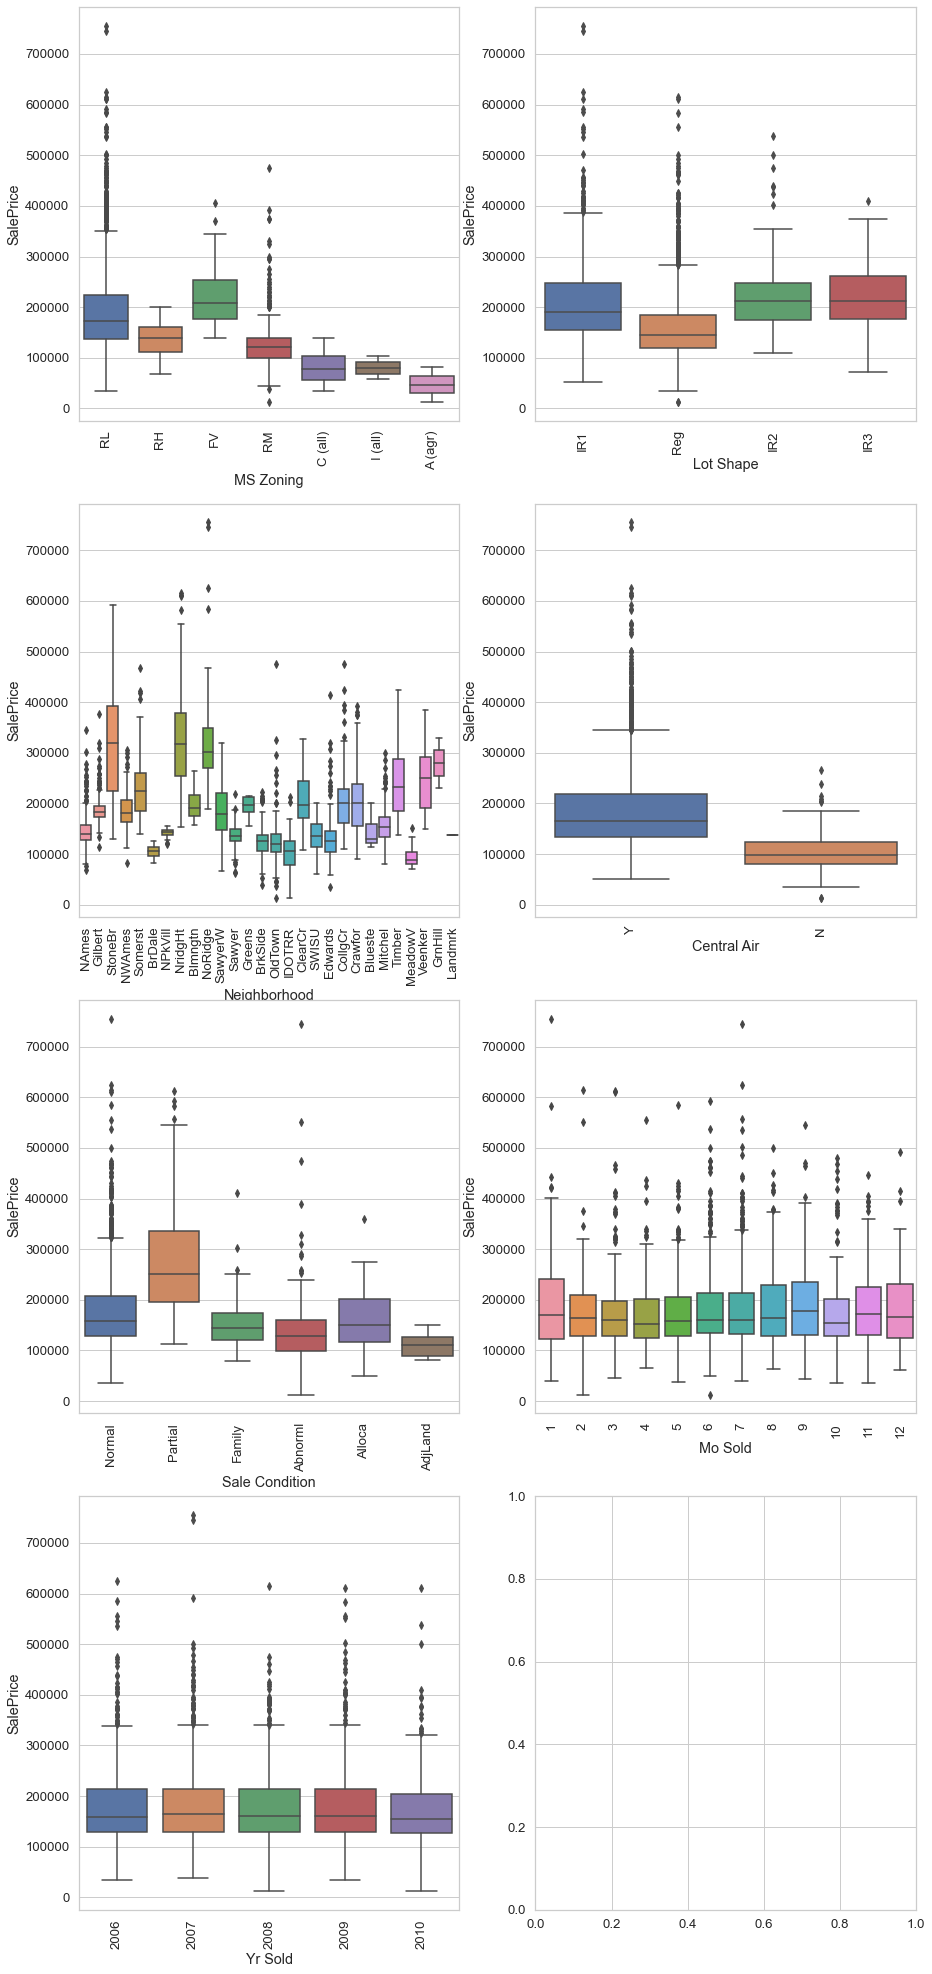

In [61]:
fig, ax = pt.subplots(4,2,figsize=(15,35))
for var, subplot in zip(categorical,ax.flatten()):
    sb.boxplot(x=var,y='SalePrice',data=dataSet.toPandas(),ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [63]:
sorted = dataSet.groupBy(["Neighborhood"])["SalePrice"].median().sort_values()
boxer = sb.boxplot(x=dataSet.select("Neighborhood"),y=dataSet.select("SalePrice"),order=list(sorted.index))
for label in boxer.get_xticklabels():
        label.set_rotation(90)

TypeError: 'GroupedData' object is not subscriptable

## FacetGrid To Analyse

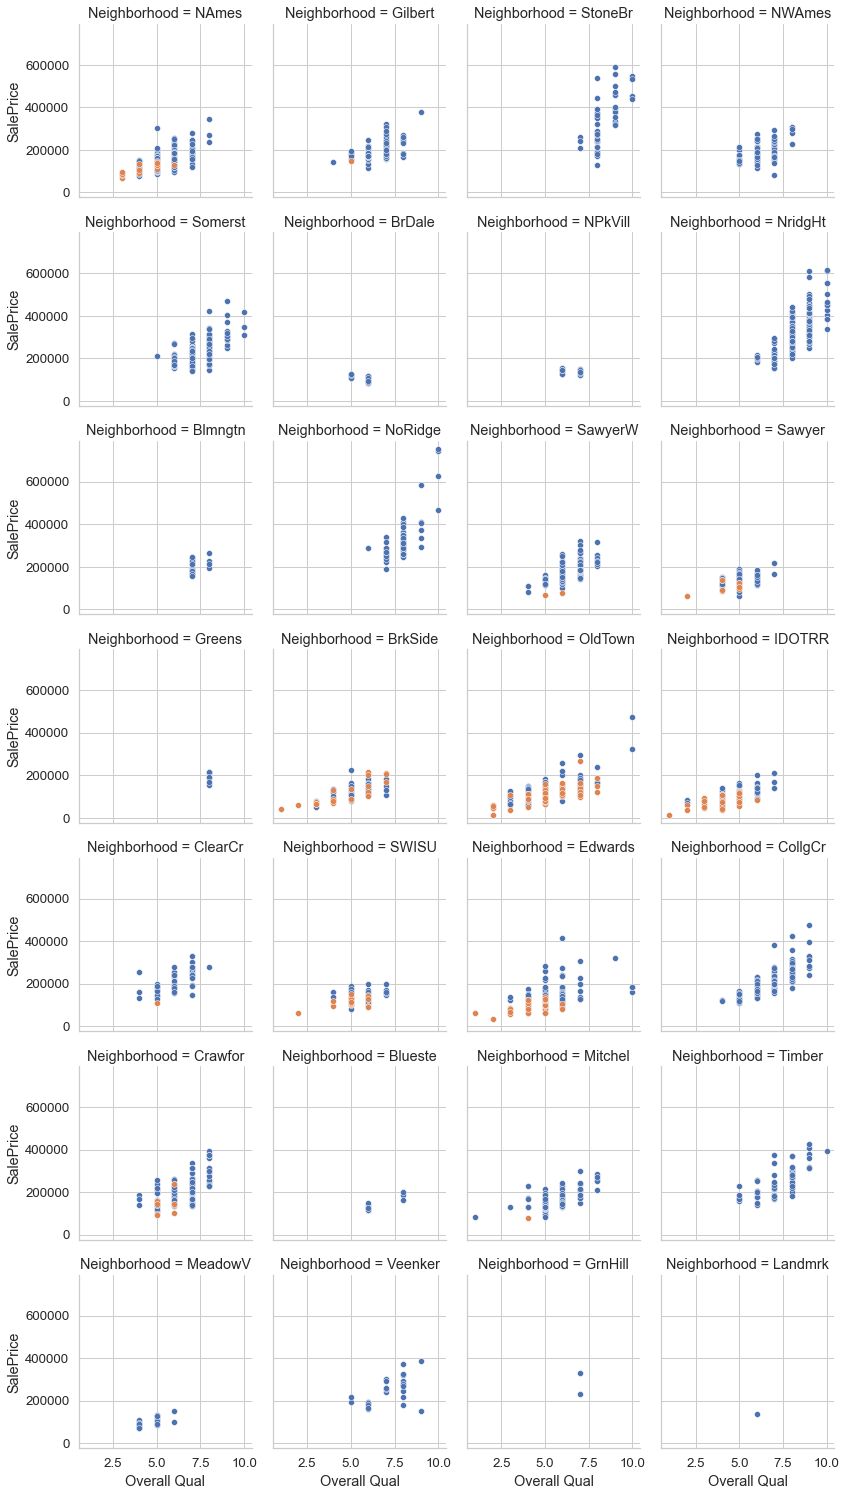

In [12]:
grid = sb.FacetGrid(data=dataSet, col="Neighborhood",hue="Central Air",col_wrap=4 )
grid.map( sb.scatterplot, "Overall Qual" , "SalePrice")